<a href="https://colab.research.google.com/github/KoffeePhysicist/notes/blob/master/ST_crowd_detection_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import urllib.request

image_url = "https://i.pinimg.com/originals/14/60/0d/14600dd0071188091d799797ebba9a9c.jpg"
save_path = "./image1.jpg"

urllib.request.urlretrieve(image_url, save_path)
resp = requests.post("https://crowd-detection.peer-ai.com/detection", files={"file": open(save_path,'rb')})
det = resp.json()

In [ ]:
print('# Heads Detected: ', len(det['detection']['heads']))
print('# Persons Detected: ', len(det['detection']['persons']))

# Heads Detected:  17
# Persons Detected:  14


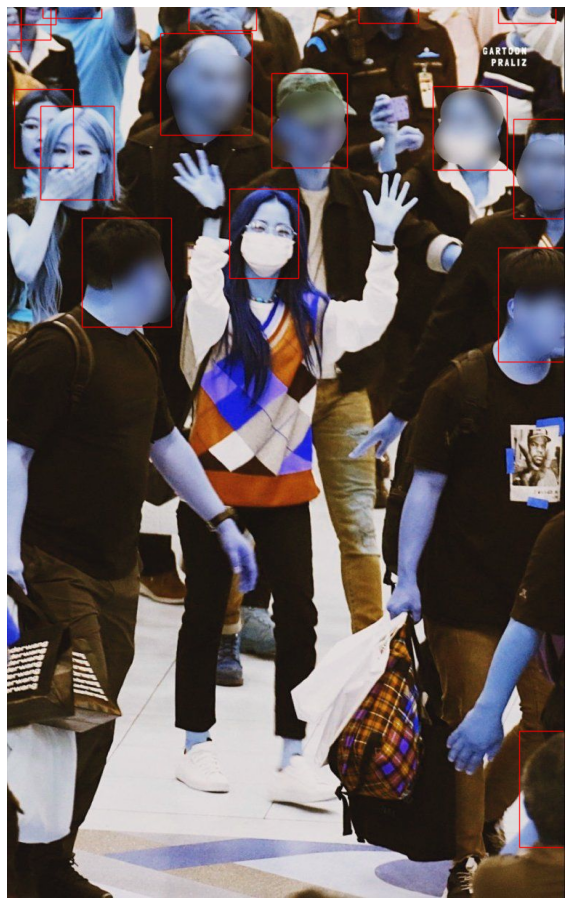

In [ ]:
import cv2
import numpy as np
import torch
import random
import matplotlib.pyplot as plt

def xywh2xyxy(x):
    # Convert nx4 boxes from [x, y, w, h] to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
    y = x.clone() if isinstance(x, torch.Tensor) else np.copy(x)
    y[:, 0] = x[:, 0] - x[:, 2] / 2  # top left x
    y[:, 1] = x[:, 1] - x[:, 3] / 2  # top left y
    y[:, 2] = x[:, 0] + x[:, 2] / 2  # bottom right x
    y[:, 3] = x[:, 1] + x[:, 3] / 2  # bottom right y
    return y

def plot_one_box(x, img, color=None, line_thickness=3):
    # Plots one bounding box on image img
    tl = line_thickness or round(0.002 * (img.shape[0] + img.shape[1]) / 2) + 1  # line/font thickness
    tl=1
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(img, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    
def plot(det, label='heads'):
    xywhs = []
    for head in det['detection'][label]:
        xywh = [head['x'],head['y'],head['w'],head['h']]
        xywhs.append(xywh)
    xywhs = np.array(xywhs)
    color = [255,0,0]
    img0 = cv2.imread('./image1.jpg')
    gn = np.array(img0.shape)[[1, 0, 1, 0]]
    xyxys = xywh2xyxy(xywhs)
    for xyxy in xyxys:
        plot_one_box(xyxy*gn, img0, color=color, line_thickness=3)
    plt.figure(figsize=(10,20))
    plt.axis('off')
    plt.imshow(img0)
    
plot(det, label='heads')
# plot(det, label='persons')